# Forest Covertype

### Data Set Information:

Predicting forest cover type from cartographic variables only (no remotely sensed data). The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data. Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types).

Some background information for these four wilderness areas: Neota (area 2) probably has the highest mean elevational value of the 4 wilderness areas. Rawah (area 1) and Comanche Peak (area 3) would have a lower mean elevational value, while Cache la Poudre (area 4) would have the lowest mean elevational value.

As for primary major tree species in these areas, Neota would have spruce/fir (type 1), while Rawah and Comanche Peak would probably have lodgepole pine (type 2) as their primary species, followed by spruce/fir and aspen (type 5). Cache la Poudre would tend to have Ponderosa pine (type 3), Douglas-fir (type 6), and cottonwood/willow (type 4).

The Rawah and Comanche Peak areas would tend to be more typical of the overall dataset than either the Neota or Cache la Poudre, due to their assortment of tree species and range of predictive variable values (elevation, etc.) Cache la Poudre would probably be more unique than the others, due to its relatively low elevation range and species composition.

Source: https://archive.ics.uci.edu/ml/datasets/covertype

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Set random seed to ensure reproducability
random_state = 42

## Exploratory Data Analysis

10 numerical,
44 binary and
1 class variable with 7 distinct classes

In [2]:
# Column names extracted from the dataset description file
columns = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", 
         "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", 
         "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", 
         "Horizontal_Distance_To_Fire_Points", "Rawah", "Neota", "Comanche Peak", "Cache la Poudre"] + \
       ["Soil_Type {}".format(i) for i in range(40)] + ["Cover_Type"]

In [3]:
data = pd.read_csv('dataset/covtype.data', header=None, names=columns)
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type 31,Soil_Type 32,Soil_Type 33,Soil_Type 34,Soil_Type 35,Soil_Type 36,Soil_Type 37,Soil_Type 38,Soil_Type 39,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Rawah                                 581012 non-null int64
Neota                                 581012 non-null int64
Comanche Peak                         581012 non-null int64
Cache la Poudre                       581012 non-null int64
Soil_Type 0                           581012 non-

There are no missing values and datatypes are also in desireable format. Let's investigate distributions of numerical variables.

In [5]:
# Setting display format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Extracting columns containing numerical values
numerical = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
             'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
             'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

# Describing numerical variables
data[numerical].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00
mean,2959.37,155.66,14.10,269.43,46.42,2350.15,212.15,223.32,142.53,1980.29
std,279.98,111.91,7.49,212.55,58.30,1559.25,26.77,19.77,38.27,1324.20
min,1859.00,0.00,0.00,0.00,-173.00,0.00,0.00,0.00,0.00,0.00
25%,2809.00,58.00,9.00,108.00,7.00,1106.00,198.00,213.00,119.00,1024.00
50%,2996.00,127.00,13.00,218.00,30.00,1997.00,218.00,226.00,143.00,1710.00
75%,3163.00,260.00,18.00,384.00,69.00,3328.00,231.00,237.00,168.00,2550.00
max,3858.00,360.00,66.00,1397.00,601.00,7117.00,254.00,254.00,254.00,7173.00


In [ ]:
data[numerical].hist(figsize=(16, 20), bins=50);

There doesn't seem to be clear outliers. Next we can plot counts of binary features.

In [ ]:
# Extracting binary feature column names
binary = data.iloc[:,10:54].columns.values.tolist()

# Counting binary variables
counts = data[binary][data[binary] == 1].count()
print(counts)

fig, ax = plt.subplots(figsize=(20, 15))
plt.barh(counts.index, counts.iloc[0:])
plt.xlabel('Count')
plt.title('Binary variables')
plt.show()

 Next we can plot correlation matrix and target variable distributions.

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))

# Calculate correlations
corr = data.corr()

# Using mask for plotting only the other half of the correlation matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(data=corr, vmin=0, vmax=1, mask=mask, square=True)
ax.set(title='Correlation Matrix')
plt.show()

There seems not to be too high correlation between variables, which is good for classifier performance. All features have some value in constructing the model.

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64


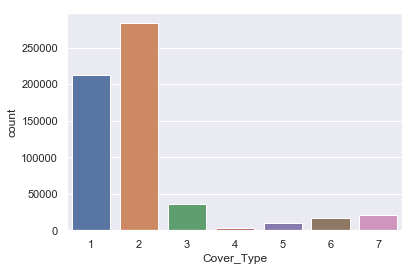

In [6]:
sns.countplot(data.Cover_Type);
print(data.Cover_Type.value_counts())

As we can see, the dataset is highly unbalanced. We need to undersample majority classes in order not to skew performance of classifiers. Lets undersample all classes to include => 10k samples. We can also use SMOTE for the class number 4, in order to make the dataset fully balanced.

In [7]:
# Splitting dataset into feature and target variables
y = data.pop('Cover_Type')
X = data
labels = data.columns

In [9]:
from imblearn.over_sampling import SMOTE

In [10]:
# SMOTE for oversampling class number 4 to include as many observations as class 5 (new minority class)
sm = SMOTE(sampling_strategy={4: 9493}, random_state=random_state)
X_resampled, y_resampled = sm.fit_resample(X, y)

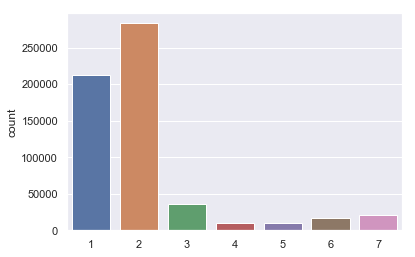

In [11]:
sns.countplot(y_resampled);

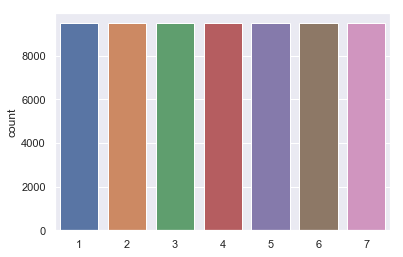

In [12]:
from imblearn.under_sampling import RandomUnderSampler

# Randomly undersampling rest of the classes
rus = RandomUnderSampler(sampling_strategy='not minority', random_state=random_state)
X_rus, y_rus = rus.fit_sample(X_resampled, y_resampled)

sns.countplot(y_rus);

All classes are now sampled, now we can explore feature distributions again.

In [13]:
X = pd.DataFrame(X_rus, columns=labels)
y = pd.DataFrame(y_rus, columns=['Cover_Type'])

In [14]:
X[numerical].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,66451.00,66451.00,66451.00,66451.00,66451.00,66451.00,66451.00,66451.00,66451.00,66451.00
mean,2748.11,156.31,16.52,228.20,50.99,1716.93,212.75,218.90,134.80,1520.62
std,418.07,109.71,8.45,209.75,60.96,1330.06,30.53,22.80,46.05,1104.26
min,1863.00,0.00,0.00,0.00,-152.00,0.00,0.00,87.00,0.00,0.00
25%,2375.00,65.00,10.00,67.00,5.00,752.00,196.00,207.00,106.00,741.00
50%,2752.00,126.00,15.00,180.00,32.00,1315.00,220.00,222.00,138.00,1273.00
75%,3108.00,258.00,22.00,330.00,79.00,2290.00,236.00,235.00,167.00,1997.00
max,3858.00,360.00,54.00,1397.00,550.00,7039.00,254.00,254.00,252.00,7141.00


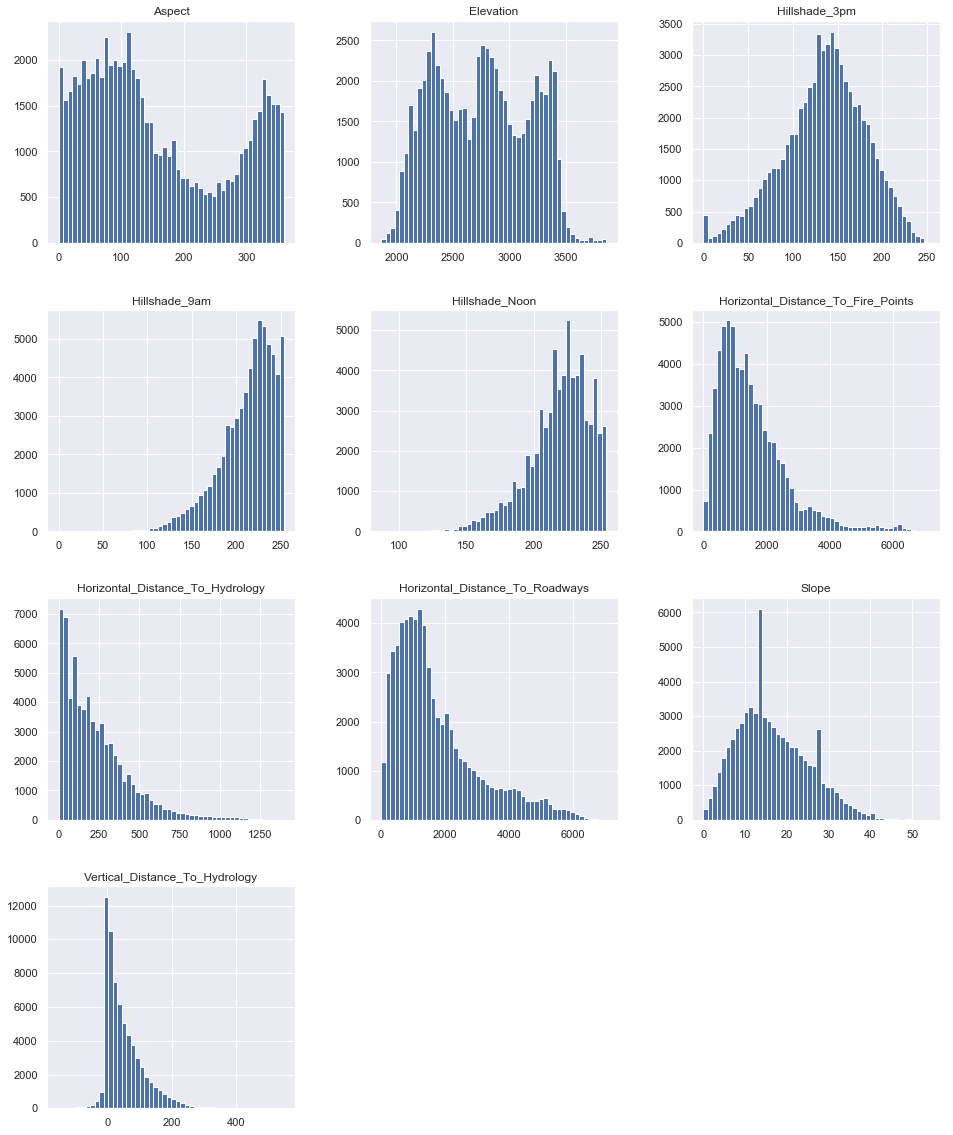

In [15]:
X[numerical].hist(figsize=(16, 20), bins=50);

## Train/Test split

In [16]:
X = X.values
y = y.values

In [17]:
from sklearn.model_selection import train_test_split

# Sizes of different sets
test_size = 0.2
train_size = 0.8

trnX, tstX, trnY, tstY = train_test_split(X, y, test_size=test_size, random_state=random_state)

## Classification

We will be using RandomizedSearchCV for tuning hyperparameters and finding roughly best performing parameters for our models. Because target classes are balanced, we can use accuracy score (default scoring method of most classifiers) for finding these hyperparameters.

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

In [ ]:
gnb = cross_val_score(GaussianNB(), trnX, trnY.ravel(), cv=5)

print("Classifier accuracy: %0.4f (+/- %0.4f)" % (gnb.mean(), gnb.std() * 2))

Classifier accuracy: 0.5988 (+/- 0.0057)

### KNN

In [ ]:
grid = {'n_neighbors':[5, 10, 15, 20, 25, 30],
        'metric':['minkowski', 'manhattan']}

knn = RandomizedSearchCV(KNeighborsClassifier(), 
                         grid, cv=5, n_iter=10,
                         random_state=random_state)

knn.fit(trnX, trnY.ravel())

print("Classifier best score: %.4f for parameters: %s" % (knn.best_score_.mean(), knn.best_params_))

Classifier best score: 0.8843 for parameters: {'n_neighbors': 5, 'metric': 'minkowski'}

### Desicion Tree

In [ ]:
grid = {'criterion':['gini', 'entropy'],
        'min_samples_split': [3, 5, 7, 9, 11, 13, 15],
        'min_samples_leaf': [3, 5, 7, 9, 11, 13, 15],
        'max_depth': np.arange(3, 15, 1)}

dtc = RandomizedSearchCV(DecisionTreeClassifier(),
                         grid, cv=5, n_iter=10,
                         random_state=random_state)

dtc.fit(trnX, trnY)

print("Classifier best score: %.4f for parameters: %s" % (dtc.best_score_.mean(), dtc.best_params_))

Classifier best score: 0.8408 for parameters: {'min_samples_split': 9, 'min_samples_leaf': 3, 'max_depth': 14, 'criterion': 'entropy'}

### RandomForest

In [ ]:
grid = {'n_estimators': np.arange(10, 300, 10),
        'max_features': ['auto', 'sqrt'],
       'max_depth': np.arange(1, 15, 1),
        'min_samples_split': np.arange(2, 15, 1)}

rfc = RandomizedSearchCV(RandomForestClassifier(),
                         grid, cv=5, n_iter=10,
                         random_state=random_state)

rfc.fit(trnX, trnY.ravel())

print("Classifier best score: %.4f for parameters: %s" % (rfc.best_score_.mean(), rfc.best_params_))

Classifier best score: 0.8421 for parameters: {'n_estimators': 290, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': 12}

### XGBoost

In [26]:
xgb_clf = XGBClassifier(learning_rate=0.05, n_estimators=300, max_depth=3, seed=random_state, n_jobs=-1)

print('Mean cross-validation score: ', np.mean(cross_val_score(xgb_clf, trnX, trnY.ravel(), cv=5)))

Mean cross-validation score:  0.7839729573777743


## Model Evaluation

Next we can test every model with the test set with the hyperparameters that were found with grid search. 

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Best models are stored in results dictionary
test_scores = {}

# Function for plotting the confusion matrix
def plot_cnf_mtx(cnf_mtx):
    fig, ax = plt.subplots(figsize=(12, 9))
    ax = sns.heatmap(cnf_mtx, annot=True, fmt="d", cbar=False, cmap='Blues', square=True)
    ax = ax.set(title='Confusion Matrix', xlabel='Predicted Label',
                ylabel='True Label', xticklabels=np.arange(1,8,1),
                yticklabels=np.arange(1,8,1))

### GaussianNB

Accuracy: 0.6032653675419457


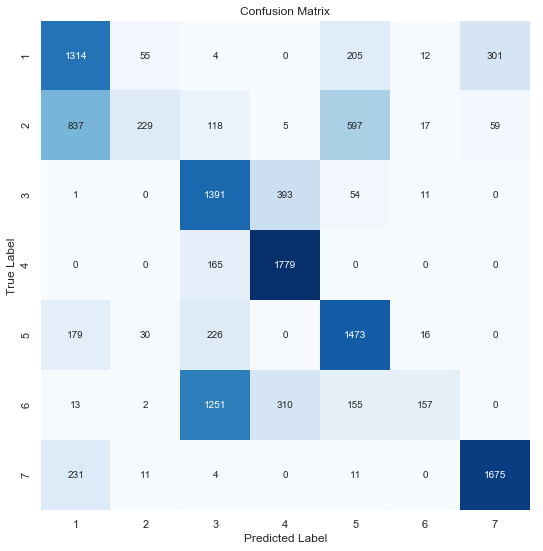

In [20]:
# GaussianNB
gnb = GaussianNB()
gnb.fit(trnX, trnY.ravel())
prdY = gnb.predict(tstX)

test_scores['GaussianNB'] = accuracy_score(tstY, prdY)
print('Accuracy:', test_scores['GaussianNB'])

cnf_mtx = confusion_matrix(tstY, prdY)
plot_cnf_mtx(cnf_mtx)

### KNearestNeighbors

Accuracy: 0.8930103077270334


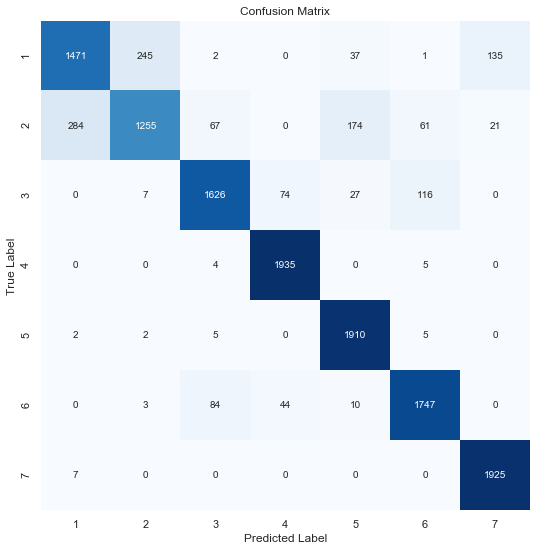

In [21]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn.fit(trnX, trnY.ravel())
prdY = knn.predict(tstX)
    
test_scores['KNN'] = accuracy_score(tstY, prdY)
print('Accuracy:', test_scores['KNN'])

cnf_mtx = confusion_matrix(tstY, prdY)
plot_cnf_mtx(cnf_mtx)

### Desicion Tree Classifier

Accuracy: 0.8479422165375066


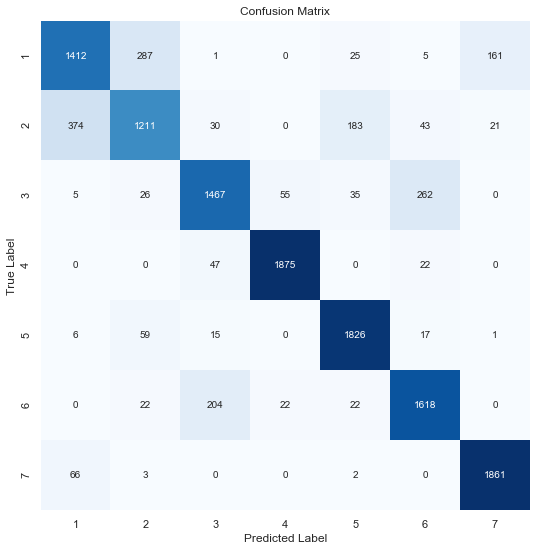

In [22]:
# Decision Tree
dtc = DecisionTreeClassifier(min_samples_split=9, min_samples_leaf=3, max_depth=14, criterion='entropy', random_state= random_state)
dtc.fit(trnX, trnY.ravel())
prdY = dtc.predict(tstX)
    
test_scores['Decision Tree'] = accuracy_score(tstY, prdY)
print('Accuracy:', test_scores['Decision Tree'])

cnf_mtx = confusion_matrix(tstY, prdY)
plot_cnf_mtx(cnf_mtx)

### Random Forest Classifier

Accuracy: 0.8430516891129336


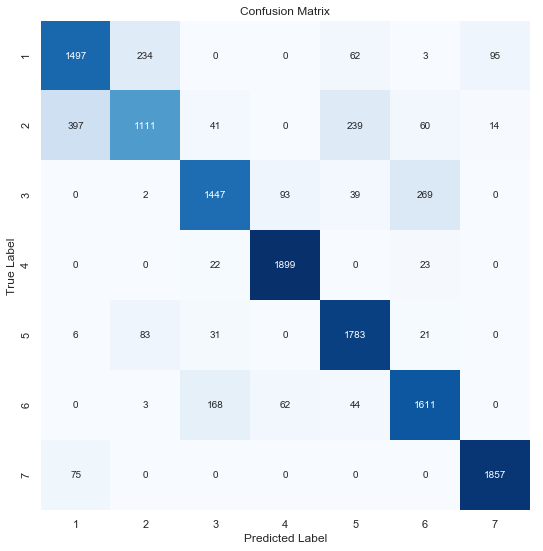

In [23]:
# Random Forest
rfc = RandomForestClassifier(n_estimators=290, min_samples_split=2, max_features='auto', max_depth=12)
rfc.fit(trnX, trnY.ravel())
prdY = rfc.predict(tstX)

test_scores['Random Forest'] = accuracy_score(tstY, prdY)
print('Accuracy:', test_scores['Random Forest'])

cnf_mtx = confusion_matrix(tstY, prdY)
plot_cnf_mtx(cnf_mtx)

### XGBoost Classifier

Accuracy: 0.7882777819577157


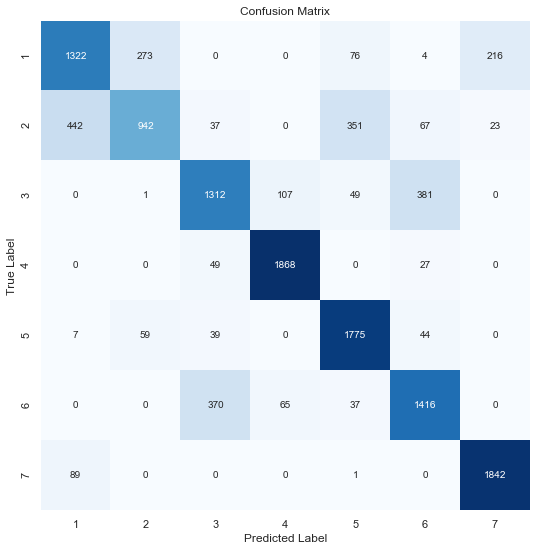

In [24]:
# XGBoost
xgb = XGBClassifier(learning_rate=0.05, n_estimators=300, max_depth=3, seed=random_state)
xgb.fit(trnX, trnY.ravel())
prdY = xgb.predict(tstX)
    
test_scores['XGBoost'] = accuracy_score(tstY, prdY)
print('Accuracy:', test_scores['XGBoost'])

cnf_mtx = confusion_matrix(tstY, prdY)
plot_cnf_mtx(cnf_mtx)

{'GaussianNB': 0.6032653675419457, 'KNN': 0.8930103077270334, 'Decision Tree': 0.8479422165375066, 'Random Forest': 0.8430516891129336, 'XGBoost': 0.7882777819577157}


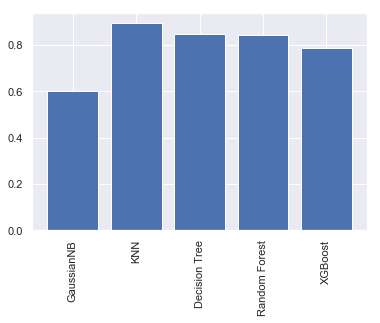

In [25]:
print(test_scores)
plt.bar(range(len(test_scores)), list(test_scores.values()), align='center')
plt.xticks(range(len(test_scores)), list(test_scores.keys()), rotation='vertical')
plt.show()

We can see that KNN had the best performance out of every model we tried out! We can try to use GridSearchCV for further hyperparameter tuning to see if it has any effect on model performance.

### KNN Further tuning

In [27]:
grid = {'n_neighbors':np.arange(3,16,1),
        'metric':['minkowski']}

knn = GridSearchCV(KNeighborsClassifier(), grid, cv=5)

knn.fit(trnX, trnY.ravel())

print("Classifier best score: %.4f for parameters: %s" % (knn.best_score_.mean(), knn.best_params_))

Classifier best score: 0.8988 for parameters: {'metric': 'minkowski', 'n_neighbors': 3}


Classifier best score: 0.8988 for parameters: {'metric': 'minkowski', 'n_neighbors': 3}

Accuracy: 0.9057256790309232


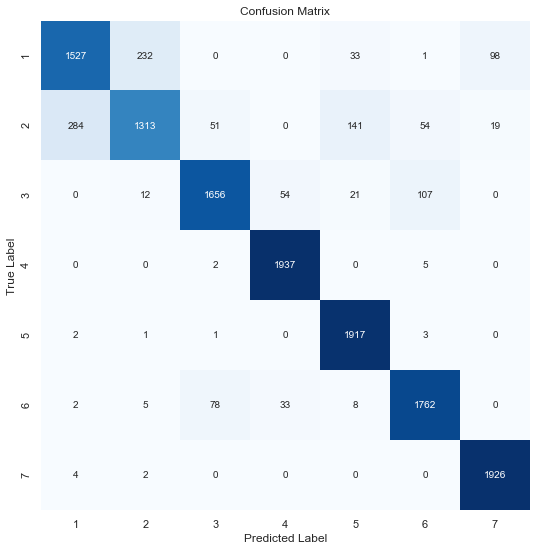

In [28]:
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
knn.fit(trnX, trnY.ravel())
prdY = knn.predict(tstX)
    
print('Accuracy:', accuracy_score(tstY, prdY))

cnf_mtx = confusion_matrix(tstY, prdY)
plot_cnf_mtx(cnf_mtx)

Further hyperparameter tuning was effective, we were able to increase the accuracy of the model from 0.893 to 0.906. One thing that can still be done is normalization of numerical variables.

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(trnX)
trnX = scaler.transform(trnX)

C:\Users\joona\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy: 0.8811978030246032


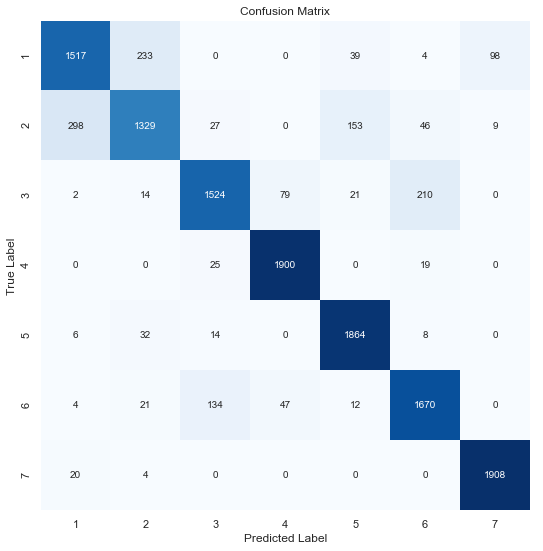

In [30]:
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
knn.fit(trnX, trnY.ravel())

# Apply scaler to test data
tstX = scaler.transform(tstX)

prdY = knn.predict(tstX)

print('Accuracy:', accuracy_score(tstY, prdY))

cnf_mtx = confusion_matrix(tstY, prdY)
plot_cnf_mtx(cnf_mtx)

Scaling numerical features to range 0 to 1 seems to hinder the performance of the classifier a bit (0.9057 -> 0.8812). This might be due to not optimal hyperparameters for the scaled data. We can try optimizing hyperparams with grid search once more to see if we can improve the model.

In [ ]:
grid = {'n_neighbors':np.arange(3,16,1),
        'metric':['minkowski']}

knn = GridSearchCV(KNeighborsClassifier(), grid, cv=5)

knn.fit(trnX, trnY.ravel())

print("Classifier best score: %.4f for parameters: %s" % (knn.best_score_.mean(), knn.best_params_))